# Multi-layer Perceptron   for MINIST Data Set


In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


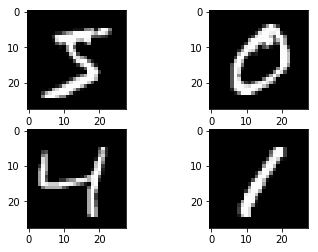

In [2]:
# load (downloaded if needed) the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2811 - acc: 0.9206 - val_loss: 0.1411 - val_acc: 0.9574
Epoch 2/10
 - 6s - loss: 0.1116 - acc: 0.9680 - val_loss: 0.0912 - val_acc: 0.9713
Epoch 3/10
 - 6s - loss: 0.0714 - acc: 0.9798 - val_loss: 0.0778 - val_acc: 0.9767
Epoch 4/10
 - 6s - loss: 0.0502 - acc: 0.9859 - val_loss: 0.0749 - val_acc: 0.9761
Epoch 5/10
 - 6s - loss: 0.0372 - acc: 0.9893 - val_loss: 0.0679 - val_acc: 0.9787
Epoch 6/10
 - 6s - loss: 0.0269 - acc: 0.9929 - val_loss: 0.0611 - val_acc: 0.9811
Epoch 7/10
 - 6s - loss: 0.0207 - acc: 0.9948 - val_loss: 0.0607 - val_acc: 0.9808
Epoch 8/10
 - 6s - loss: 0.0141 - acc: 0.9971 - val_loss: 0.0622 - val_acc: 0.9800
Epoch 9/10
 - 6s - loss: 0.0108 - acc: 0.9979 - val_loss: 0.0571 - val_acc: 0.9820
Epoch 10/10
 - 6s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0585 - val_acc: 0.9818

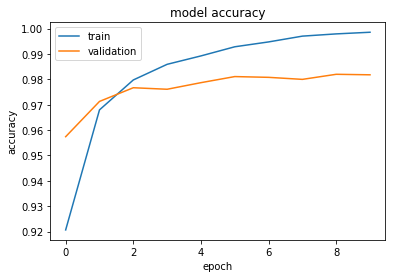

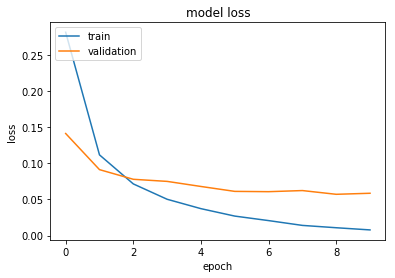

In [10]:
def plot_train_and_val(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left') 
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()


plot_train_and_val(history)

# **Simple Convolutional Neural Network for MNIST  Data Set**

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')  
#remove thislie and keep it 32*32*3

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [15]:
# build the model
model = baseline_model()
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 60s - loss: 0.2253 - acc: 0.9356 - val_loss: 0.0774 - val_acc: 0.9759
Epoch 2/10
 - 59s - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0440 - val_acc: 0.9851
Epoch 3/10
 - 60s - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0432 - val_acc: 0.9852
Epoch 4/10
 - 59s - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0404 - val_acc: 0.9874
Epoch 5/10
 - 60s - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0343 - val_acc: 0.9887
Epoch 6/10
 - 59s - loss: 0.0264 - acc: 0.9919 - val_loss: 0.0331 - val_acc: 0.9893
Epoch 7/10
 - 59s - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0359 - val_acc: 0.9882
Epoch 8/10
 - 60s - loss: 0.0189 - acc: 0.9942 - val_loss: 0.0329 - val_acc: 0.9887
Epoch 9/10
 - 59s - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0331 - val_acc: 0.9882
Epoch 10/10
 - 60s - loss: 0.0137 - acc: 0.9961 - val_loss: 0.0328 - val_acc: 0

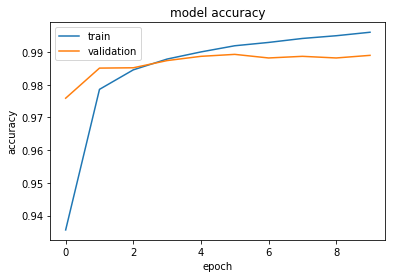

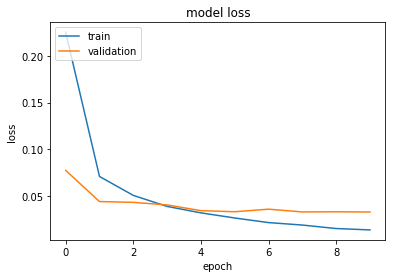

In [16]:
def plot_train_and_val(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left') 
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()


plot_train_and_val(history)